# Multi Agent Systems  
> Student: Otniel Elkayam  
MSc Data mining, Jerusalem College of Technology

In [9]:
from IPython.display import YouTubeVideo

## Table of contents
- [**Self builded game - Tanks**](#Self-builded-game---Tanks) - [GitHub](https://github.com/Otnielush/Tank-game-RL)
- [**SA2C on gym walker envinronments**](#Walker-and-multi-walker)
    - [**Multiwalker**](#Multiwalker-on-pettingzoo)
- [**MADDPG for MultiWalker**](#MADDPG-for-MultiWalker)
- [**MADDPG for "Connect 4"**](#MADDPG-for-"Connect-4")

# Self builded game - Tanks

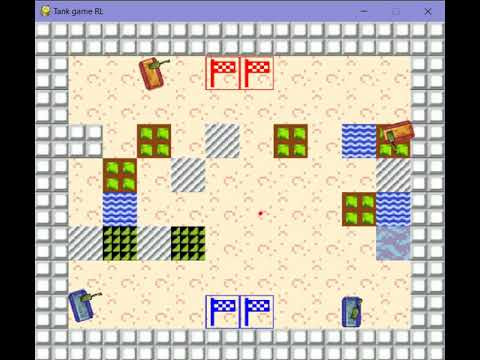

In [11]:
YouTubeVideo('jyPL5bdEppI', width=640, height=480, controls=2, rel=0)

Это было начало работы над проектом, у меня был базовый уровень понимания в обучении с подкреплением и не много опыта с алгоритмом SARSA.  
Из своей сложности для самообучения, алгоритму требовалось десятки и даже сотни тысяч игр, чтобы научиться играть в эту игру.  
На вход алгоритму поступало упрощенное изображение **15 на 15 с 4 каналами**.  

Канал:  

    1. объекты на карте
    2. дружеские танки 
    3. вражеские танки
    4. снаряды/ракеты
    
А так же 10 информационных параметров о танке, например запас здоровья, градус поворода башни, запас снарядов и тп.  
    
Каждый танк мог принимать следущие действия:

    1. движение вперёд / назад
    2. повород влево / вправо
    3. поворот башни влево / вправо
    4. выстрелить
    5. использовать умение
    
Первые три действия я изменил из Continious (от -1 до +1) в Discrete ( выбор 1 из 7 вариантов ) в которых распределил значения от -1 до +1.  
Четвёртое действие "выстрел" являлся логическим, от 0 до 0,5 - не стрелять, от 0,5 до 1 - выстрелить.  
Получилось что алгоритм должен был уметь работать с параллельными действиями.  
SARSA не умеет этого делать, в итоге алгоритм не понимал за какое точно действие от получает награду. 

Это получил к следующий результат:

    Я создал специальный режим в игре для базовой тренировки: "арена" или "тир". Танки одной команды находились в центре, а по кругу были вражеские танки и не много союзных танков. 
    Задача была научиться стрелять по врагам.  
    Но в итоге "обученные" танки просто вращали в одну сторону башню и постоянно стреляли. То есть алгоритм не связал нашраду за попадание с точно направленным выстрелом, а понял что он получает награду когда стреляет и поворачивает башню.


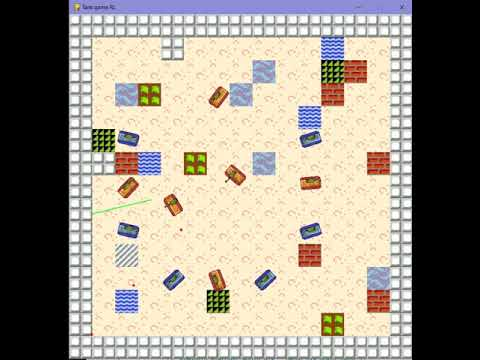

In [11]:
YouTubeVideo('f2JhhmJuJPU', width=600, height=600, controls=2, rel=0)

Игра давала награды за попадание по врагу, уничтожение врага, захват базы, победу. И штрафы за попадание/уничтожение союзников.  
Т.к. присутствовали нашрады за личные действие - это упрощало обучение. Если бы была награда только за общую победу, то отдельным агентам в команде труднее было бы найти связь действий с наградой.  
Однако награда за попадание / уничтожение врага была отложенной. Снаряд после выстрела достигал цели через несколько шагов и это усложняло процесс обучения при том что было несколько параллельных действий.

Еще проблемы с которыми я столкнулся в этой задачи:  
Окружение для агента изначально разрабатывалась как игра (возможно когда нибудь будет закончена) и соответственно алгоритм был усложнён дополнительными вычислениями, которые замедляли скорость работы игры. Если запускать игру без видео и с 4 агентами со случайной политикой, то на моем ноутбуке достигалась скорость в 400 ФПС.  
Но когда я запускал агентов с глубокой нейронной сетью на **Tensorflow** максимальная скорость была 35 ФПС.  Для обучения в такими данными и действиями мне нужно было до 100 000 игр для обучения агента.

### Архитектура модели

<img src="graphics/model2.png" width="600" align="center">

На выходе 25 значений:
1. с 1 по 7 - движение вперёд / назад   
2. с 8 по 15 - повород влево / вправо
3. с 16 по 21 - поворот башни влево / вправо
4. 22-23 - выстрелить
5. 24-25 - использовать умение
Все 25 значений это Q значение ужидаемой награды. По приведенным выше диапазонам выбиралось наибольшее значение, переводилось в численное значение и передовалось как выбранное действие.  
*Например:* мы проверяем какое значение с 1 по 7 больше, например 5. Переводим в не прерывное значение по таблице ([-1.  , -0.66, -0.33,  0.,  0.33 ,  0.66,  1.  ]) -> **0.33**. Значит наш танк будет ускоряться на 0,33% своей мощности. И далие проверяем среди 8-15 значений.  
Бинарные значение: сравниваем 22 и 23 значение, если 22 больше, то это **False** и выстрела не будет. Если 23 значение больше, то это **True** и танк будет стрелять.

Этот подход не видел чтобы применяли и не могу сказать будет ли он работать. Т.к алгоритм я не заменял на архитектуры,
которые могут работать в более сложных окружениях.

### Итог:
***Этот проект я заморозил и перешел к использованию готовых решений для обучения с подкреплением***  
[Project on GitHub](https://github.com/Otnielush/Tank-game-RL)

___

# Walker and multi walker

Я нашел две библиотеки с окружением для обучения агентов, это **gym** от OpenAI - окружение walker, и его мульти агентная версия - **pettingzoo**  
Because walking on your feet is a challenging task for robots. To date, all robots on their feet work on manual algorithms. Only this year was a record robot neural models of reinforcement learning. He walked 2 kilometers on the asphalt.  

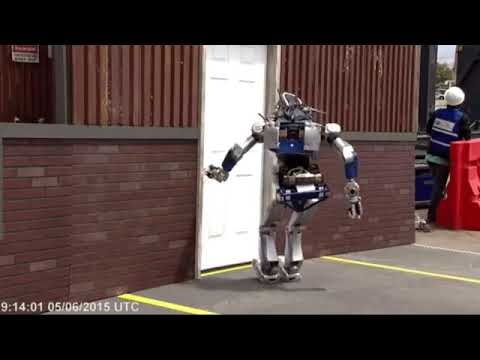

In [14]:
YouTubeVideo('wc4HmXHTveQ', width=600, height=450, controls=2, rel=0)

Я решил сначала обучить агента базовому хождению, а потом использовать его для командной работы.  
- **Reward** -  distance traveled and punishment for fall  
- **Observation space:** 24 parameters  
- **Action space:** Continuous 4 {-1:1}
- Very fast library for training the models

Алгоритм для обучения я выбрал **Soft Actor 2 Critics**.

- Works with continuous action spaces
- Uses entropy regularization with noise on output for exploration-exploitation trade-off
- Soft update between target model and current model for a smooth learning output

[Soft Actor-Critic: Off-Policy Maximum Entropy Deep Reinforcement Learning with a Stochastic Actor, Haarnoja et al, 2018](https://arxiv.org/abs/1801.01290)

Изначально я начал работать с моделью с 3-мя полностью соединёнными слоями, а затем переделал весь алгоритм со слоями RNN.

**Training results of RNN SA2C in BipedalWalker envinronment**
![](graphics/RNN_SA2C_walker.png)

Улучшение модели с помощью RNN слоя доло положительные результаты. Simple model achieved similar results in 3000+ games

### Architecture Actor`s model  (Pytorch)
>```Actor(  
  (rnn): GRU(31, 128, num_layers=2, batch_first=True)  
  (mu): Linear(in_features=128, out_features=4, bias=True)  
  (log_std_linear): Linear(in_features=128, out_features=4, bias=True)  
)```

>```===================================================================================================================
Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
===================================================================================================================
Actor                                    --                        --                        --
├─GRU: 1-1                               [1, 1, 31]                [1, 1, 128]               160,896
├─Linear: 1-2                            [1, 1, 128]               [1, 1, 4]                 516
├─Linear: 1-3                            [1, 1, 128]               [1, 1, 4]                 516
===================================================================================================================
Total params: 161,928
Trainable params: 161,928
Non-trainable params: 0
Total mult-adds (M): 0.16
===================================================================================================================
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.65
Estimated Total Size (MB): 0.65
===================================================================================================================```

Two outputs of model:  
1. expected value (policy)
2. Standard deviation (entropy regularization) (Noise to policy)

## Trained SA2C model

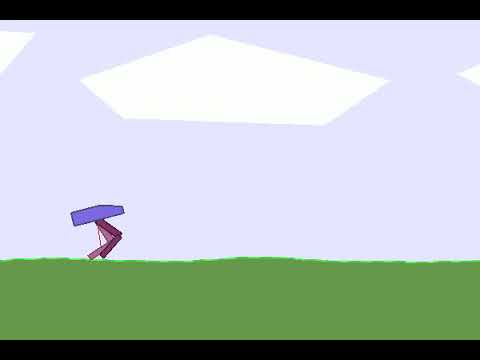

In [13]:
YouTubeVideo('l-onY7wZDMI', width=600, height=450, controls=2, rel=0)

___

## Hard core version of envinronment

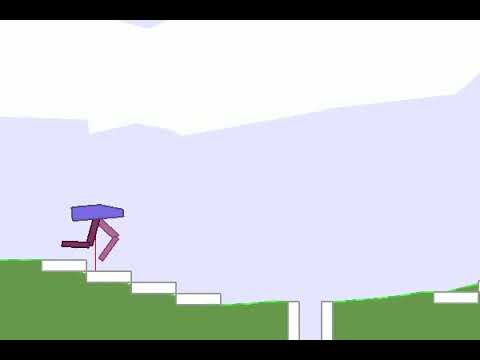

In [17]:
YouTubeVideo('BPrialP6tpY', width=600, height=450, controls=2, rel=0)

___

## Multiwalker on pettingzoo

<img src="graphics/multiw_animation.gif" width="600" align="left"><img src="graphics/sisl_multiwalker_aec.svg" width="300">

- **Observation space:** 31 parameters (24 self parameters, 2 parameters from each neighbor left and right, 3 parameters about package)
- **Action space:** Continuous 4 {-1:1}
- **Reward** -  distance traveled and punishment for fall

**Difficulties:**
- In general reward is common. The agent can act perfectly, but because of the total loss, he will get a negative result. And he will learn from it that he acted incorrectly.
- You need to consider the actions of your neighbor


## MultiWalker training results (SA2C)

![](graphics/SA2C_multi_walker.png)
*We can see rewards of 2 trained walkers for each game round*

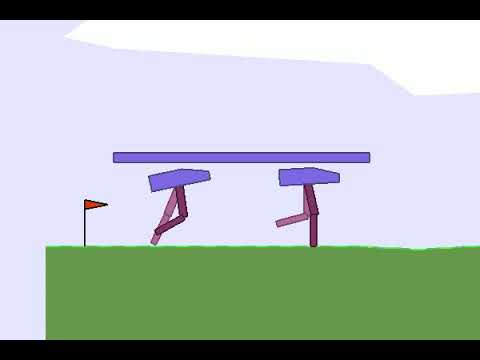

In [31]:
YouTubeVideo('zA2iVBSFfjk', width=600, height=450, rel=0)

И так мы видим, что SA2C в моей конфигурации не смог справиться с этой задачей

### Итог:
***SA2C в моей конфигурации не смог справиться с этой задачей***  
[Project on GitHub](https://github.com/Otnielush/Tank-game-RL)

___

# MADDPG for MultiWalker
https://paperswithcode.com/method/maddpg

### Multi Agent Deep Deterministic Policy Gradient
- Actor – Critic based algorithm
- Works with continuous action spaces
- Uses noise for network parameters not for actions
- Soft update between target model and current model for a smooth learning output
- Critic predict Q value from all Actors` actions in team (Centralizing)

<img src="graphics/hipn1wqq.png" width="450" align="left">

### Architecture MADDPG`s model (Pytorch)
>```MLPNetwork(  
  (fc1): Linear(in_features=31, out_features=300, bias=True)  
  (fc2): Linear(in_features=300, out_features=300, bias=True)  
  (fc3): Linear(in_features=300, out_features=4, bias=True)  
)```

>```===================================================================================================================
Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
===================================================================================================================
MLPNetwork                               --                        --                        --
├─BatchNorm1d: 1-1                       [1, 31]                   [1, 31]                   62
├─Linear: 1-2                            [1, 31]                   [1, 300]                  9,600
├─Linear: 1-3                            [1, 300]                  [1, 300]                  90,300
├─Linear: 1-4                            [1, 300]                  [1, 4]                    1,204
===================================================================================================================
Total params: 101,166
Trainable params: 101,166
Non-trainable params: 0
Total mult-adds (M): 0.10
===================================================================================================================
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.40
Estimated Total Size (MB): 0.41
===================================================================================================================```

## MultiWalker training results (MADDPG)

![](graphics/maddpg_multi_walker_11hours.png)
*training took 11 hours. Learning rate - 0.005*

    Looking at the graph of the results, I decided that it was worth continuing to train the model.

![](graphics/maddpg_multi_walker_20hours.png)
*training took +20 hours. Learning rate - 0.0001*

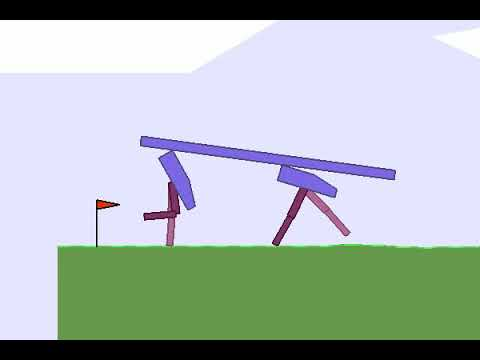

In [35]:
YouTubeVideo('Kww8RU3aOjo', width=600, height=450, rel=0)

    Perhaps I greatly reduced the training rating and the time for training the algorithm increased. Anyway, I decided to apply this algorithm to another envinronment.

___

# MADDPG for "Connect 4"
(or "4 In Row")

<img src="graphics/classic_connect_four.gif" width="350" align="left"><img src="graphics/classic_connect_four_aec.svg" width="300">

- **Agents:** 2
- **Action Shape:**	Discrete(7)
- **Observation Shape:** (6, 7, 2)
- **Reward:** 1 for win, -1 for lose or allegal move
- **Victory conditions:** collect a row of 4 balls horizontally or vertically or diagonally.

Для этой игры я переделал немного алгоритм. Теперь модель полиси состояла из 2 СНН слоёв и 4 полностью соединённых.  
Тренировалось 2 агента на общих данных. Тем не менее если один агент побеждал в 70% в последних играх то его модель копировалась в другого агента.
Так что в принципе можно сказаль что алгоритм тренировался сам с собой.
Так же я переделал подсчет награды и сохранения в буфер. Так как у нас есть награда только в конце игры, я её распространил на предъидущие ходы и затем отправлял в буфер. До этого эта версия алгоритма основывалась на награде на каждом шагу и награду за следующий шаг.

### Architecture MADDPG`s model for Connect 4 (Pytorch)
>```MLPNetwork_CNN(
  (cnn1): Conv2d(2, 8, kernel_size=(2, 2), stride=(1, 1))
  (cnn2): Conv2d(8, 8, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=244, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=7, bias=True)
)```

>```===================================================================================================================
Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
===================================================================================================================
MLPNetwork_CNN                           --                        --                        --
├─Conv2d: 1-1                            [1, 2, 7, 6]              [1, 8, 6, 5]              72
├─Conv2d: 1-2                            [1, 8, 6, 5]              [1, 8, 5, 4]              264
├─Linear: 1-3                            [1, 244]                  [1, 50]                   12,250
├─Linear: 1-4                            [1, 50]                   [1, 50]                   2,550
├─Linear: 1-5                            [1, 50]                   [1, 50]                   2,550
├─Linear: 1-6                            [1, 50]                   [1, 7]                    357
===================================================================================================================
Total params: 18,043
Trainable params: 18,043
Non-trainable params: 0
Total mult-adds (M): 0.03
===================================================================================================================
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.07
Estimated Total Size (MB): 0.08
===================================================================================================================```

## Connect 4 training results (CNN MADDPG)

![](graphics/5000_cnn.png)
*When the graph goes up, this agent wins. At the beginning of the training, there were turning points when suddenly another agent began to win.
But in the future, on average, one agent won 20% more. And almost always it was agent # 2. Since I set the copying of the model from one agent to another with more than 70% wins, this copying did not happen so often. So this training took place on different models. Although they were trained on the same data.*

![](graphics/50000_cnn.png)

*The total training time lasted 5 hours. The model did not reach the professional level, but learned certain patterns. If you continue training, the model will improve its level of play.*